# CLASSIFICATION USING K-NEAREST NEIGHBORS

DATA:
    
    The Dataset 'Social Network Ads' is a kaggle dataset
    
Attributes:
    * UserID
    * Gender
    * Estimated Salary
    * Purchased - Target Column (Binary)

In [65]:
#importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Reading in the dataset

dataset = pd.read_csv('Social_Network_Ads.csv')

In [3]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
dataset.shape

(400, 5)

In [6]:
dataset.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [7]:
dataset.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


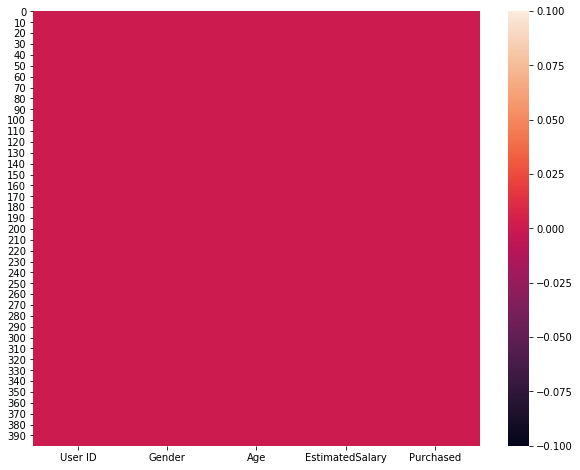

In [8]:
# Checking for null values 

plt.figure(figsize=(10,8))
sns.heatmap(dataset.isnull())

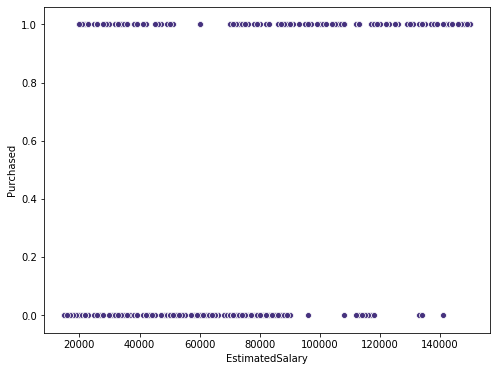

In [9]:
# PLot between Estimated Salary and Purchased(Target) column

plt.figure(figsize=(8,6))
sns.set_palette(palette = 'viridis')
sns.scatterplot(x = 'EstimatedSalary', y = 'Purchased', data = dataset)

In [10]:
X = dataset.iloc[:, 1:4]   # Feature dataset
y = dataset.iloc[:, -1]    # Target dataset

In [11]:
X.head()

,Gender,Age,EstimatedSalary
0,Male,19,19000
1,Male,35,20000
2,Female,26,43000
3,Female,27,57000
4,Male,19,76000


In [12]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [13]:
# Data Preprocessing

from sklearn.preprocessing import LabelEncoder

In [14]:
encoder = LabelEncoder()

In [15]:
X['Gender'] = encoder.fit_transform(X['Gender'])

In [16]:
X.head()

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000


In [17]:
# Converting into numpy arrays

X = X.values
y = y.values

In [18]:
X

array([[    1,    19, 19000],
       [    1,    35, 20000],
       [    0,    26, 43000],
       ...,
       [    0,    50, 20000],
       [    1,    36, 33000],
       [    0,    49, 36000]], dtype=int64)

In [19]:
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [20]:
# Splitting into training and testing dataset

from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [22]:
X_train.shape, y_train.shape

((300, 3), (300,))

In [23]:
X_test.shape, y_test.shape

((100, 3), (100,))

In [24]:
X_train

array([[     0,     57, 122000],
       [     0,     39,  71000],
       [     1,     47,  25000],
       [     1,     24,  19000],
       [     0,     36,  50000],
       [     0,     32, 150000],
       [     0,     48,  29000],
       [     1,     30, 107000],
       [     1,     60,  34000],
       [     1,     38,  61000],
       [     1,     33,  31000],
       [     1,     39,  71000],
       [     1,     55,  39000],
       [     0,     49,  39000],
       [     0,     43, 112000],
       [     1,     27,  20000],
       [     0,     26,  17000],
       [     0,     37,  93000],
       [     1,     42,  54000],
       [     1,     35,  61000],
       [     1,     29,  75000],
       [     0,     38,  80000],
       [     1,     45,  26000],
       [     0,     54, 108000],
       [     1,     46,  23000],
       [     0,     23,  28000],
       [     1,     37,  75000],
       [     1,     42,  65000],
       [     0,     35,  71000],
       [     0,     51, 146000],
       [  

In [25]:
X_test

array([[     0,     46,  22000],
       [     0,     59,  88000],
       [     0,     28,  44000],
       [     0,     48,  96000],
       [     0,     29,  28000],
       [     0,     30,  62000],
       [     0,     47, 107000],
       [     0,     29,  83000],
       [     1,     40,  75000],
       [     1,     42,  65000],
       [     0,     35,  65000],
       [     0,     53,  34000],
       [     0,     23,  48000],
       [     0,     20,  23000],
       [     1,     30,  87000],
       [     1,     35, 108000],
       [     0,     52,  38000],
       [     0,     46,  74000],
       [     1,     39,  42000],
       [     1,     56,  60000],
       [     0,     22,  27000],
       [     1,     29,  80000],
       [     1,     47,  23000],
       [     0,     59,  76000],
       [     1,     19,  19000],
       [     1,     51,  23000],
       [     1,     42,  80000],
       [     1,     37,  53000],
       [     0,     55, 125000],
       [     0,     19,  21000],
       [  

In [26]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler

In [27]:
sc = StandardScaler()

In [28]:
X_train[:,1:3] = sc.fit_transform(X_train[:,1:3])

In [29]:
X_train

array([[ 0,  1,  1],
       [ 0,  0,  0],
       [ 1,  0, -1],
       [ 1, -1, -1],
       [ 0,  0,  0],
       [ 0,  0,  2],
       [ 0,  1, -1],
       [ 1,  0,  1],
       [ 1,  2, -1],
       [ 1,  0,  0],
       [ 1,  0, -1],
       [ 1,  0,  0],
       [ 1,  1,  0],
       [ 0,  1,  0],
       [ 0,  0,  1],
       [ 1, -1, -1],
       [ 0, -1, -1],
       [ 0,  0,  0],
       [ 1,  0,  0],
       [ 1,  0,  0],
       [ 1,  0,  0],
       [ 0,  0,  0],
       [ 1,  0, -1],
       [ 0,  1,  1],
       [ 1,  0, -1],
       [ 0, -1, -1],
       [ 1,  0,  0],
       [ 1,  0,  0],
       [ 0,  0,  0],
       [ 0,  1,  2],
       [ 1,  0,  0],
       [ 0, -1,  0],
       [ 0,  1,  0],
       [ 1, -1, -1],
       [ 1,  0,  0],
       [ 1,  0,  0],
       [ 0,  0,  0],
       [ 0,  0,  1],
       [ 0,  0,  0],
       [ 0,  0,  1],
       [ 0,  0, -1],
       [ 1, -1, -1],
       [ 1,  1,  0],
       [ 0,  0, -1],
       [ 0,  0,  0],
       [ 1,  1,  2],
       [ 0,  0,  1],
       [ 0,  

In [30]:
X_test[:,1:3] = sc.transform(X_test[:,1:3])

In [31]:
X_test

array([[ 0,  0, -1],
       [ 0,  2,  0],
       [ 0,  0,  0],
       [ 0,  1,  0],
       [ 0,  0, -1],
       [ 0,  0,  0],
       [ 0,  0,  1],
       [ 0,  0,  0],
       [ 1,  0,  0],
       [ 1,  0,  0],
       [ 0,  0,  0],
       [ 0,  1, -1],
       [ 0, -1,  0],
       [ 0, -1, -1],
       [ 1,  0,  0],
       [ 1,  0,  1],
       [ 0,  1,  0],
       [ 0,  0,  0],
       [ 1,  0,  0],
       [ 1,  1,  0],
       [ 0, -1, -1],
       [ 1,  0,  0],
       [ 1,  0, -1],
       [ 0,  2,  0],
       [ 1, -1, -1],
       [ 1,  1, -1],
       [ 1,  0,  0],
       [ 1,  0,  0],
       [ 0,  1,  1],
       [ 0, -1, -1],
       [ 0,  0,  0],
       [ 1, -1,  0],
       [ 1,  0,  2],
       [ 1,  0,  0],
       [ 1,  0,  1],
       [ 1,  0,  0],
       [ 1,  0,  0],
       [ 0,  0,  0],
       [ 1, -1, -1],
       [ 0, -1,  0],
       [ 1,  1, -1],
       [ 0, -1,  0],
       [ 1, -1,  0],
       [ 1,  0, -1],
       [ 1, -1,  0],
       [ 0,  0,  2],
       [ 1,  0,  0],
       [ 0,  

In [32]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)

In [33]:
# Training the model on training sets

classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [34]:
# Predicting the results on testing set

predictions = classifier.predict(X_test)

In [35]:
predictions

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1], dtype=int64)

In [38]:
# Comparison of Predictions against True values

np.concatenate((predictions.reshape(len(predictions),1),y_test.reshape(len(y_test),1)),1)

array([[0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 1],
       [0,

In [60]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [61]:
print(confusion_matrix(y_test,predictions))  # The model misclassified 10 data points

[[61  2]
 [ 8 29]]


In [62]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92        63
           1       0.94      0.78      0.85        37

    accuracy                           0.90       100
   macro avg       0.91      0.88      0.89       100
weighted avg       0.90      0.90      0.90       100



In [66]:
accuracy_score(y_test, predictions)*100  # The model had an accuracy of 90%

90.0

# THE END